In [1]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to check if a point is inside the original sphere
def is_inside_sphere(x, y, z, center, radius):
    return ((x - center[0])**2 + (y - center[1])**2 + (z - center[2])**2) <= radius**2

def dilate_in_3d(tensor, center, original_radius, direction, dilation_length):
    for x in range(tensor.size(0)):
        for y in range(tensor.size(1)):
            for z in range(tensor.size(2)):
                if is_inside_sphere(x, y, z, center, original_radius):
                    # Calculate the new point after dilation
                    new_x = int(x + direction[0] * dilation_length)
                    new_y = int(y + direction[1] * dilation_length)
                    new_z = int(z + direction[2] * dilation_length)
                    # Set the value to 1 if the new point is within the bounds of the tensor
                    if 0 <= new_x < tensor.size(0) and 0 <= new_y < tensor.size(1) and 0 <= new_z < tensor.size(2):
                        tensor[new_x, new_y, new_z] = 1


In [41]:
tensor = torch.zeros((80, 96, 80))
radius = random.uniform(4, 10)
center = (random.randint(0, tensor.size(0)), random.randint(0, tensor.size(1)), random.randint(0, tensor.size(2)))
for x in range(tensor.size(0)):
    for y in range(tensor.size(1)):
        for z in range(tensor.size(2)):
            if is_inside_sphere(x, y, z, center, radius):
                tensor[x, y, z] = 1

# 3D Dilation process
for _ in range(10):  # 10 random directions
    # Random dilation length between 2 and 10 pixels
    dilation_length = random.uniform(4, 8)

    # Random direction in 3D space
    direction = np.random.randn(3)  # Generate a random 3D direction
    direction /= np.linalg.norm(direction)  # Normalize the direction vector

    # Dilation in 3D
    dilate_in_3d(tensor, center, radius, direction, dilation_length)

tensor.shape, tensor.sum()  # Display the tensor shape and the sum to verify the 3D dilation


(torch.Size([80, 96, 80]), tensor(8042.))

IndexError: index 80 is out of bounds for dimension 2 with size 80

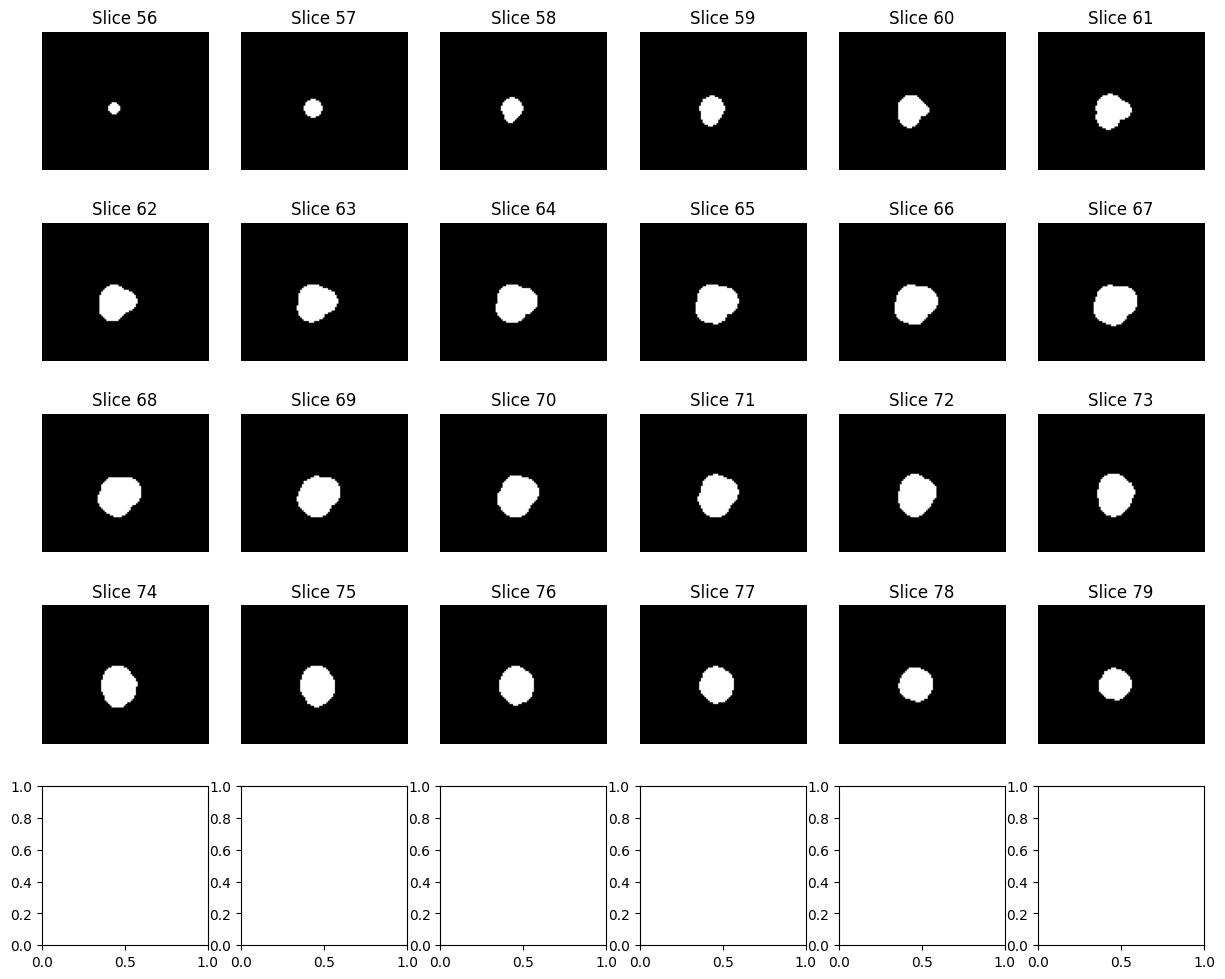

In [42]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(15, 12))

# Plot each slice
for i in range(30):
    row = i // 6
    col = i % 6
    axes[row, col].imshow(tensor[:, :, center[2]-15+i], cmap='gray')
    axes[row, col].set_title(f'Slice {center[2]-15+i}')
    axes[row, col].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
print(center)